In this notebook, we clusterize our 200k entries so that each future customer could compare with persons owning his group.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_train_scaled.csv', index_col = 0)

In [3]:
X.shape

(181547, 15)

In [4]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT
114149,0.000000,0.029136,0.112989,0.202042,0.102132,0.010105,0.134770,0.259136,0.679409,0.401169,1,0.049925,0.143174,0.834787,0.163350
276288,0.000000,0.027130,0.314310,0.141655,0.273850,0.138399,0.217245,0.490065,0.897997,0.446750,2,0.143154,0.108129,0.046117,0.170120
171531,0.052632,0.019608,0.088110,0.096610,0.071829,0.044942,0.211619,0.406975,0.894180,0.849724,1,0.057059,0.100521,0.425392,0.181403
53072,0.000000,0.012086,0.141157,0.065045,0.105499,0.214605,0.065684,0.561206,0.668905,0.862763,2,0.133898,0.105289,0.058100,0.199452
195442,0.000000,0.014593,0.067739,0.039333,0.041526,0.093178,0.213407,0.681673,0.788789,0.560242,4,0.058364,0.057202,0.134023,0.235556


Text(0, 0.5, 'Inertia')

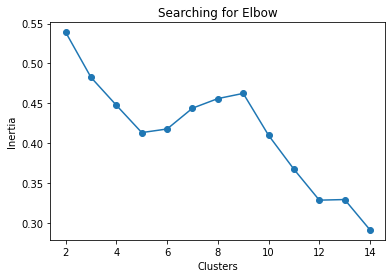

In [6]:
from sklearn import cluster, metrics

# Initialization, empty list
silhouettes = []

for num_clusters in range(2, 15):
    
    # Creating KMEANS for each number of clusters
    cls = cluster.KMeans(n_clusters=num_clusters)
    
    # Fitting model
    cls.fit(X)
    
    # Silhouette_score for each model
    silh = metrics.silhouette_score(X,cls.labels_)
    
    # Adding score in empty list for each model
    silhouettes.append(silh)
    
    

plt.plot(range(2, 15), silhouettes, marker = 'o')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [5]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA

cls = cluster.KMeans(n_clusters = 12)

# Creating PCA
pca = PCA(n_components = 2)

# Fit
pca.fit(X)

# We want to see the explained variance of our 2 features
print (pca.explained_variance_ratio_.cumsum())

# Transforming our X in 2 dimensions
X_trans_2= pca.transform(X)

[0.93993613 0.95409368]


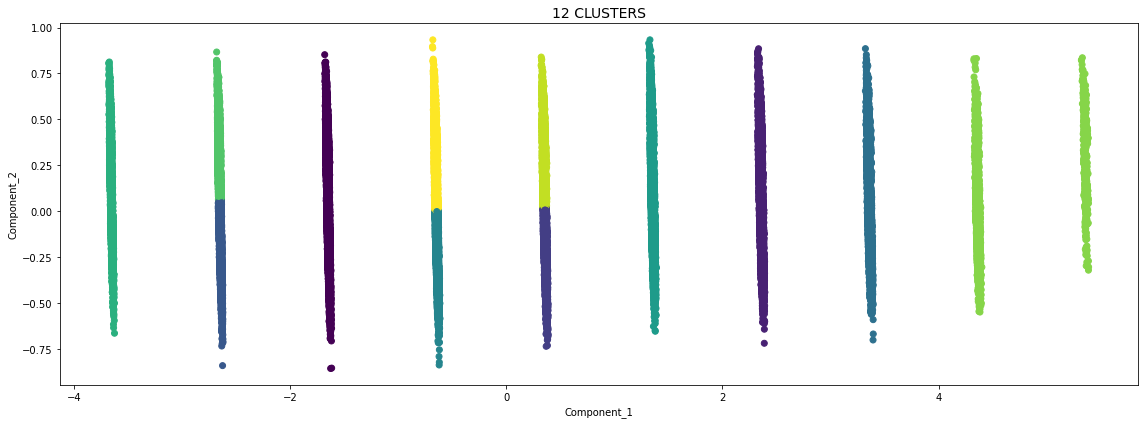

In [6]:
fig = plt.figure(figsize = [16,6])

# 3 clusters
cls = cluster.KMeans(n_clusters = 12)
cls.fit(X_trans_2)

# 
ax = fig.gca()  

# Spatial coordinates of each point in function of our 3 components
x = X_trans_2[:,0]
y = X_trans_2[:,1]


# Plotting scatters distinguishing our 2 clusters
ax.scatter(x, y, label='', marker = 'o',c = cls.labels_)

# Naming axes
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')


# Title
plt.title("12 CLUSTERS", fontsize = 14)

plt.tight_layout()
plt.show()


In [7]:
# fitting with our data
km = cls.fit(X)

In [8]:
km

KMeans(n_clusters=12)

In [9]:
import pickle

In [10]:
pickle.dump (km, open ('clustering', 'wb'))

In [11]:
# Labels
km.labels_

array([ 7,  8,  1, ...,  5, 10,  4])

In [12]:
#check
km.labels_.shape

(181547,)

In [14]:
# Adding membership group on your DataFrame

MEMBERSHIP = km.labels_
X['MEMBERSHIP'] = MEMBERSHIP
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
114149,0.000000,0.029136,0.112989,0.202042,0.102132,0.010105,0.134770,0.259136,0.679409,0.401169,1,0.049925,0.143174,0.834787,0.163350,7
276288,0.000000,0.027130,0.314310,0.141655,0.273850,0.138399,0.217245,0.490065,0.897997,0.446750,2,0.143154,0.108129,0.046117,0.170120,8
171531,0.052632,0.019608,0.088110,0.096610,0.071829,0.044942,0.211619,0.406975,0.894180,0.849724,1,0.057059,0.100521,0.425392,0.181403,1
53072,0.000000,0.012086,0.141157,0.065045,0.105499,0.214605,0.065684,0.561206,0.668905,0.862763,2,0.133898,0.105289,0.058100,0.199452,8
195442,0.000000,0.014593,0.067739,0.039333,0.041526,0.093178,0.213407,0.681673,0.788789,0.560242,4,0.058364,0.057202,0.134023,0.235556,4


In [16]:
X0 = X[X['MEMBERSHIP']== 0]

In [17]:
X0.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
150176,0.052632,0.015596,0.056180,0.060915,0.057239,0.203272,0.175375,0.089482,0.186758,0.694723,5,0.046742,0.079912,0.404859,0.145299,0
29987,0.000000,0.007071,0.067191,0.044746,0.046016,0.247879,0.404440,0.003752,0.726654,0.823881,5,0.102906,0.114096,0.180959,0.212991,0
35708,0.000000,0.019608,0.172429,0.139458,0.135802,0.245813,0.137736,0.074892,0.451371,0.673636,5,0.107189,0.142870,0.265779,0.189299,0
19104,0.000000,0.014593,0.078652,0.062567,0.079686,0.058341,0.253358,0.073086,0.861913,0.495930,5,0.066705,0.086727,0.253390,0.145299,0
305569,0.052632,0.010581,0.174157,0.077558,0.175084,0.085920,0.467681,0.007642,0.779834,0.909168,5,0.181697,0.137890,0.046870,0.145299,0


In [18]:
# Dimensions
X0.shape

(24812, 16)

In [19]:
# Stat0
stat0 = X0.describe()
stat0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,24812.000000,24812.000000,24812.000000,24812.000000,24812.000000,24812.000000,24812.000000,24812.000000,24812.000000,24812.000000,24812.0,24812.000000,24812.000000,24812.000000,24812.000000,24812.0
mean,0.015029,0.017370,0.157394,0.105323,0.140582,0.166757,0.235049,0.119794,0.633903,0.588413,5.0,0.123360,0.137847,0.255947,0.167515,0.0
std,0.030697,0.011776,0.103912,0.056199,0.095160,0.145931,0.146976,0.081349,0.209621,0.214407,0.0,0.081796,0.071937,0.210468,0.022184,0.0
min,0.000000,0.000050,0.000000,0.000000,0.001122,0.000112,0.000000,0.000000,0.000027,0.000000,5.0,0.003526,0.002960,0.005399,0.034691,0.0
25%,0.000000,0.009578,0.070418,0.064724,0.059484,0.056163,0.109113,0.054189,0.521481,0.440952,5.0,0.064318,0.087207,0.085191,0.145299,0.0
50%,0.000000,0.014593,0.136719,0.096698,0.113356,0.122376,0.227059,0.114909,0.693157,0.618544,5.0,0.102926,0.124260,0.234382,0.165607,0.0
75%,0.000000,0.022115,0.216539,0.136241,0.203143,0.233935,0.360531,0.178859,0.790601,0.760661,5.0,0.164997,0.174724,0.311881,0.179145,0.0
max,0.578947,0.247781,0.995264,0.871017,0.915825,0.650569,0.790736,0.835626,1.000000,0.987189,5.0,0.905745,1.000000,1.000000,1.000000,0.0


In [20]:
stat0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat0.csv')

In [21]:
#########################################################################################################################

In [22]:
X1 = X[X['MEMBERSHIP']== 1]

In [23]:
# Dimensions
X1.shape

(15602, 16)

In [24]:
# Stat1
stat1 = X1.describe()
stat1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,15602.000000,15602.000000,15602.000000,15602.000000,15602.000000,15602.000000,15602.000000,15602.000000,15602.000000,15602.000000,15602.0,15602.000000,15602.000000,15602.000000,15602.000000,15602.0
mean,0.029122,0.016032,0.139649,0.092543,0.125378,0.074748,0.157986,0.310527,0.575136,0.500700,1.0,0.114994,0.128142,0.215145,0.166375,1.0
std,0.038348,0.010479,0.094033,0.050800,0.087046,0.051368,0.113494,0.117691,0.219489,0.212780,0.0,0.071466,0.067205,0.107103,0.024025,0.0
min,0.000000,0.000050,0.000000,0.001318,0.001122,0.001340,0.000000,0.000278,0.000013,0.000000,1.0,0.004185,0.006774,0.000000,0.031339,1.0
25%,0.000000,0.009578,0.067180,0.052466,0.057239,0.032004,0.058924,0.247603,0.432113,0.339136,1.0,0.064796,0.078868,0.133909,0.145299,1.0
50%,0.000000,0.014593,0.118921,0.087893,0.102132,0.064984,0.168833,0.329582,0.627723,0.507912,1.0,0.098196,0.116586,0.242126,0.165156,1.0
75%,0.052632,0.019608,0.190674,0.119282,0.159371,0.107735,0.208326,0.399889,0.747080,0.667822,1.0,0.148297,0.163575,0.267834,0.181402,1.0
max,0.473684,0.398225,0.831461,0.459885,0.831650,0.243971,0.476317,0.605947,1.000000,0.985506,1.0,0.958076,0.867053,0.503314,0.430199,1.0


In [25]:
stat1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat1.csv')

In [26]:
###############################################################################################################################

In [27]:
X2 = X[X['MEMBERSHIP']== 2]

In [28]:
# Dimensions
X2.shape

(18340, 16)

In [29]:
# Stat2
stat2 = X2.describe()
stat2

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,18340.000000,18340.000000,18340.000000,18340.000000,18340.000000,18340.000000,18340.000000,18340.000000,18340.000000,18340.000000,18340.0,18340.000000,18340.000000,18340.000000,18340.000000,18340.0
mean,0.044949,0.018276,0.192588,0.112772,0.173275,0.134127,0.180750,0.538707,0.686737,0.621842,3.0,0.144814,0.142209,0.160504,0.166455,2.0
std,0.046774,0.012413,0.105748,0.054921,0.098431,0.102327,0.121481,0.180021,0.167047,0.192048,0.0,0.082963,0.071953,0.107762,0.021838,0.0
min,0.000000,0.000050,0.003371,0.000879,0.001122,0.000223,0.000000,0.000417,0.004908,0.000000,3.0,0.001603,0.002084,0.000004,0.012821,2.0
25%,0.000000,0.010796,0.116584,0.076082,0.102132,0.049185,0.071005,0.477525,0.605617,0.493938,3.0,0.084623,0.091193,0.056809,0.145299,2.0
50%,0.052632,0.015596,0.179775,0.106505,0.158249,0.109312,0.167742,0.597541,0.725390,0.650240,3.0,0.128577,0.129389,0.149634,0.165607,2.0
75%,0.052632,0.022115,0.257978,0.141707,0.215488,0.197144,0.294313,0.652633,0.808372,0.771115,3.0,0.186623,0.180030,0.253390,0.179145,2.0
max,0.631579,0.348077,1.000000,0.852651,1.000000,0.445232,0.629274,0.871752,1.000000,0.987189,3.0,0.966600,0.815711,0.733979,0.258120,2.0


In [30]:
stat2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat2.csv')

In [31]:
###############################################################################################################################

In [32]:
X3 = X[X['MEMBERSHIP']== 3]

In [33]:
# Dimensions
X3.shape

(4542, 16)

In [34]:
# Stat3
stat3 = X3.describe()
stat3

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.0
mean,0.001054,0.017495,0.157195,0.104983,0.140942,0.240853,0.303510,0.573880,0.655379,0.623968,8.134963,0.117127,0.131293,0.269770,0.166097,3.0
std,0.009346,0.010737,0.113046,0.059514,0.102874,0.227354,0.192200,0.139984,0.214056,0.206404,0.341721,0.077954,0.065166,0.227513,0.019272,0.0
min,0.000000,0.001260,0.000000,0.003673,0.001122,0.000056,0.000131,0.001806,0.001989,0.000000,8.000000,0.005585,0.009551,0.005403,0.035409,3.0
25%,0.000000,0.010895,0.059775,0.061411,0.050505,0.073680,0.135718,0.562074,0.555816,0.490457,8.000000,0.058116,0.084251,0.084621,0.145299,3.0
50%,0.000000,0.014593,0.130751,0.091944,0.109989,0.163354,0.295577,0.603446,0.721325,0.658080,8.000000,0.095319,0.118469,0.220620,0.165607,3.0
75%,0.000000,0.022115,0.223428,0.137261,0.209877,0.327295,0.456821,0.647909,0.813066,0.789836,8.000000,0.160773,0.166750,0.332273,0.179145,3.0
max,0.210526,0.247781,0.661798,0.798626,0.552189,1.000000,1.000000,0.860775,0.959785,0.990500,9.000000,0.598196,0.637129,0.953405,0.253607,3.0


In [35]:
stat3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat3.csv')

In [36]:
###############################################################################################################################

In [37]:
X4 = X[X['MEMBERSHIP']== 4]

In [38]:
# Dimensions
X4.shape

(30166, 16)

In [39]:
# Stat4
stat4 = X4.describe()
stat4

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,30166.000000,30166.000000,30166.000000,30166.000000,30166.000000,30166.000000,30166.000000,30166.000000,30166.000000,30166.000000,30166.0,30166.000000,30166.000000,30166.000000,30166.000000,30166.0
mean,0.031075,0.017519,0.153389,0.105019,0.137662,0.150369,0.202845,0.547654,0.627079,0.581021,4.0,0.118944,0.136019,0.269562,0.166688,4.0
std,0.041338,0.012987,0.104444,0.057839,0.096162,0.125541,0.132161,0.170183,0.211022,0.215027,0.0,0.079445,0.071223,0.218394,0.021798,0.0
min,0.000000,0.000000,0.000000,0.003374,0.001122,0.000447,0.000000,0.000139,0.000085,0.000000,4.0,0.002675,0.003908,0.000004,0.025641,4.0
25%,0.000000,0.009578,0.067191,0.063094,0.057239,0.052158,0.086772,0.532583,0.512183,0.429437,4.0,0.061711,0.085917,0.101275,0.145299,4.0
50%,0.000000,0.014593,0.129211,0.096179,0.107744,0.114560,0.189855,0.597749,0.685059,0.612551,4.0,0.098196,0.122303,0.238883,0.165607,4.0
75%,0.052632,0.022115,0.213483,0.135064,0.191919,0.212916,0.318726,0.648048,0.786825,0.753600,4.0,0.157064,0.172486,0.332788,0.179145,4.0
max,0.736842,1.000000,1.000000,1.000000,1.000000,0.548906,0.713015,1.000000,1.000000,1.000000,4.0,0.889729,0.719802,1.000000,0.772080,4.0


In [40]:
stat4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat4.csv')

In [41]:
###########################################################################################################################

In [42]:
X5 = X[X['MEMBERSHIP']== 5]

In [44]:
# Dimensions
X5.shape

(22310, 16)

In [45]:
# Stat5
stat5 = X5.describe()
stat5

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,22310.000000,22310.000000,22310.000000,22310.000000,22310.000000,22310.000000,22310.000000,22310.000000,22310.000000,22310.000000,22310.0,22310.000000,22310.000000,22310.000000,22310.000000,22310.0
mean,0.005874,0.016779,0.154843,0.103310,0.138900,0.190703,0.263331,0.352820,0.633357,0.598778,6.0,0.124361,0.139248,0.255285,0.166632,5.0
std,0.020243,0.013199,0.104539,0.056658,0.095806,0.172876,0.160552,0.089601,0.212906,0.214075,0.0,0.080987,0.071903,0.210994,0.021382,0.0
min,0.000000,0.000050,0.000000,0.000281,0.001122,0.000112,0.000000,0.000139,0.000011,0.000000,6.0,0.001518,0.003529,0.005400,0.017094,5.0
25%,0.000000,0.009578,0.067416,0.062216,0.057239,0.061858,0.125665,0.293595,0.518370,0.448688,6.0,0.065631,0.088796,0.084833,0.145299,5.0
50%,0.000000,0.014593,0.132602,0.094659,0.111111,0.136417,0.264524,0.356398,0.694292,0.632471,6.0,0.104550,0.125508,0.223271,0.165607,5.0
75%,0.000000,0.022115,0.213483,0.134150,0.191919,0.263064,0.394648,0.422502,0.793783,0.769384,6.0,0.164997,0.175627,0.311948,0.179145,5.0
max,0.315789,0.749260,0.976598,0.871017,0.943883,0.753908,0.856420,0.504099,1.000000,0.992935,6.0,0.879272,0.923658,0.969493,0.772080,5.0


In [46]:
stat5.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat5.csv')

In [ ]:
#########################################################################################################################

In [47]:
X6 = X[X['MEMBERSHIP']== 6]

In [48]:
# Dimensions
X6.shape

(10363, 16)

In [49]:
# Stat6
stat6 = X6.describe()
stat6

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.0,10363.000000,10363.000000,10363.000000,10363.000000,10363.0
mean,0.002829,0.017908,0.167298,0.108503,0.150173,0.213784,0.279503,0.522617,0.648121,0.596916,7.0,0.125096,0.135285,0.237485,0.166497,6.0
std,0.014132,0.011754,0.109749,0.060666,0.100825,0.199255,0.173372,0.134703,0.206655,0.211402,0.0,0.079183,0.068111,0.205157,0.020423,0.0
min,0.000000,0.000050,0.000000,0.003427,0.001122,0.000167,0.000000,0.000556,0.000125,0.000000,7.0,0.005051,0.005828,0.000004,0.042735,6.0
25%,0.000000,0.010581,0.078652,0.066961,0.068462,0.064956,0.130844,0.487703,0.543560,0.450630,7.0,0.065795,0.086891,0.077377,0.145299,6.0
50%,0.000000,0.015095,0.148584,0.097717,0.127946,0.148950,0.273378,0.554676,0.704541,0.624523,7.0,0.106556,0.122013,0.179573,0.165607,6.0
75%,0.000000,0.022115,0.234522,0.139484,0.214366,0.289778,0.417023,0.606920,0.802910,0.765909,7.0,0.167609,0.172564,0.288054,0.179145,6.0
max,0.263158,0.247781,0.720764,0.891176,0.719416,0.849151,0.926771,0.751841,1.000000,0.987189,7.0,0.652760,0.747890,0.999904,0.258120,6.0


In [50]:
stat6.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat6.csv')

In [51]:
###############################################################################################################################

In [52]:
X7 = X[X['MEMBERSHIP']== 7]

In [53]:
# Dimensions
X7.shape

(6759, 16)

In [54]:
# Stat7
stat7 = X7.describe()
stat7

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6759.0,6759.000000,6759.000000,6759.000000,6759.000000,6759.0
mean,0.027114,0.015562,0.064109,0.094111,0.058534,0.072964,0.161351,0.315201,0.517696,0.488364,1.0,0.057866,0.131173,0.645102,0.163276,7.0
std,0.039249,0.012377,0.043145,0.058300,0.040555,0.050063,0.111730,0.115989,0.235340,0.219658,0.0,0.032751,0.069559,0.170540,0.015457,0.0
min,0.000000,0.000552,0.000000,0.004657,0.001122,0.000558,0.000000,0.000139,0.000026,0.000000,1.0,0.002290,0.008769,0.357914,0.145299,7.0
25%,0.000000,0.009578,0.034211,0.055502,0.030303,0.032129,0.063525,0.254481,0.335148,0.318600,1.0,0.034395,0.082507,0.528114,0.145299,7.0
50%,0.000000,0.013089,0.053825,0.081355,0.046016,0.063030,0.172845,0.336390,0.556130,0.499918,1.0,0.052104,0.118181,0.560011,0.163350,7.0
75%,0.052632,0.019608,0.088144,0.119703,0.079686,0.104232,0.208610,0.402043,0.712774,0.663933,1.0,0.073988,0.166248,0.819218,0.172376,7.0
max,1.000000,0.498521,0.550562,0.871017,0.551066,0.239113,0.476710,0.505627,0.940840,0.987189,1.0,0.427426,0.804524,0.999982,0.212991,7.0


In [60]:
stat7.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat7.csv')

In [55]:
############################################################################################################################

In [56]:
X8 = X[X['MEMBERSHIP']== 8]

In [57]:
# Dimensions
X8.shape

(17041, 16)

In [66]:
# Stat8
stat8 = X8.describe()
stat8

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.0,17041.000000,17041.000000,17041.000000,17041.000000,17041.0
mean,0.044132,0.017843,0.171160,0.105780,0.153617,0.105790,0.153193,0.449647,0.669925,0.576486,2.0,0.130513,0.135325,0.186038,0.166791,8.0
std,0.045530,0.011792,0.103070,0.054210,0.095477,0.075352,0.110094,0.168789,0.170554,0.205685,0.0,0.078925,0.070008,0.113360,0.023695,0.0
min,0.000000,0.000050,0.002966,0.003128,0.001122,0.000000,0.000000,0.000139,0.000090,0.000000,2.0,0.004008,0.005211,0.005390,0.000000,8.0
25%,0.000000,0.010581,0.100638,0.066961,0.085297,0.042597,0.053733,0.347645,0.583084,0.429437,2.0,0.073146,0.085895,0.077069,0.145299,8.0
50%,0.052632,0.014593,0.157303,0.098982,0.142536,0.090331,0.142795,0.500486,0.706818,0.600530,2.0,0.113612,0.122216,0.197483,0.165607,8.0
75%,0.052632,0.022115,0.228021,0.135398,0.214366,0.157381,0.236828,0.573572,0.794528,0.739266,2.0,0.169768,0.171946,0.253390,0.179145,8.0
max,0.526316,0.373151,1.000000,0.871017,1.000000,0.338321,0.554693,0.756843,1.000000,0.990500,2.0,1.000000,0.759250,0.754944,1.000000,8.0


In [61]:
stat8.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat8.csv')

In [62]:
#############################################################################################################################

In [63]:
X9 = X[X['MEMBERSHIP']== 9]

In [64]:
# Dimensions
X9.shape

(11382, 16)

In [65]:
# Stat9
stat9 = X9.describe()
stat9

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,11382.000000,11382.000000,11382.000000,11382.000000,11382.000000,11382.000000,11382.000000,11382.000000,11382.000000,11382.000000,11382.0,11382.000000,11382.000000,11382.000000,11382.000000,11382.0
mean,0.042731,0.015606,0.077162,0.089845,0.069306,0.094986,0.149880,0.419879,0.475980,0.481529,2.0,0.069305,0.126074,0.505414,0.165715,9.0
std,0.045576,0.009516,0.050370,0.055991,0.045955,0.070740,0.108312,0.178427,0.241214,0.225082,0.0,0.042620,0.068824,0.229097,0.020249,0.0
min,0.000000,0.001053,0.000000,0.003673,0.001122,0.000502,0.000000,0.000139,0.000000,0.000000,2.0,0.001494,0.004291,0.016347,0.042735,9.0
25%,0.000000,0.009578,0.044944,0.050194,0.039282,0.038633,0.053788,0.291128,0.286159,0.302401,2.0,0.039335,0.077973,0.295994,0.145299,9.0
50%,0.052632,0.013590,0.061519,0.079052,0.053872,0.076904,0.138760,0.475267,0.489613,0.482025,2.0,0.059865,0.113080,0.481792,0.163351,9.0
75%,0.052632,0.019608,0.108185,0.113231,0.102132,0.138608,0.230406,0.561067,0.681672,0.663933,2.0,0.088176,0.159285,0.719767,0.179145,9.0
max,0.421053,0.172559,0.496043,0.727043,0.484848,0.341447,0.554824,0.753925,1.000000,0.984658,2.0,0.502465,0.853960,0.999982,0.430199,9.0


In [67]:
stat9.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat9.csv')

In [68]:
###############################################################################################################################

In [69]:
X10 = X[X['MEMBERSHIP']== 10]

In [70]:
# Dimensions
X10.shape

(13091, 16)

In [71]:
# Stat10
stat10 = X10.describe()
stat10

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,13091.000000,13091.000000,13091.000000,13091.000000,13091.000000,13091.000000,13091.000000,13091.000000,13091.000000,13091.000000,13091.0,13091.000000,13091.000000,13091.000000,13091.000000,13091.0
mean,0.045447,0.016033,0.085270,0.089664,0.076493,0.117355,0.169544,0.500120,0.508228,0.481137,3.0,0.074413,0.123601,0.448977,0.165921,10.0
std,0.048131,0.010719,0.055813,0.055888,0.050583,0.095848,0.120116,0.200877,0.238381,0.226671,0.0,0.046003,0.066493,0.229274,0.020764,0.0
min,0.000000,0.000050,0.000000,0.000808,0.000000,0.000279,0.000000,0.000000,0.000010,0.000000,3.0,0.000000,0.000000,0.016368,0.000000,10.0
25%,0.000000,0.009578,0.044944,0.049878,0.046016,0.042709,0.061628,0.361540,0.320360,0.299224,3.0,0.042032,0.075560,0.253390,0.145299,10.0
50%,0.052632,0.014593,0.068297,0.079650,0.057239,0.089214,0.150994,0.580103,0.537330,0.482025,3.0,0.064680,0.111282,0.409521,0.163351,10.0
75%,0.052632,0.019608,0.117254,0.113262,0.102132,0.167151,0.277870,0.643324,0.708835,0.663933,3.0,0.095319,0.156962,0.560697,0.179145,10.0
max,0.631579,0.348077,0.550562,0.871017,0.551066,0.442943,0.628315,0.910240,1.000000,0.987189,3.0,0.398130,0.838510,0.999919,0.253609,10.0


In [72]:
stat10.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat10.csv')

In [73]:
##############################################################################################################################

In [75]:
X11 = X[X['MEMBERSHIP']== 11]

In [76]:
# Dimensions
X11.shape

(7139, 16)

In [77]:
# Stat11
stat11 = X11.describe()
stat11

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.0,7139.000000,7139.000000,7139.000000,7139.000000,7139.0
mean,0.011825,0.013722,0.094432,0.077144,0.085147,0.044702,0.176385,0.151784,0.494194,0.417044,0.0,0.086387,0.116450,0.339482,0.162829,11.0
std,0.024806,0.007193,0.077753,0.048344,0.069595,0.028335,0.118996,0.056636,0.232912,0.197080,0.0,0.057940,0.059240,0.219994,0.022692,0.0
min,0.000000,0.000552,0.000000,0.006679,0.001122,0.002401,0.000000,0.000278,0.000004,0.000000,0.0,0.003141,0.008184,0.005399,0.059829,11.0
25%,0.000000,0.009578,0.033708,0.036205,0.034792,0.020992,0.080949,0.113033,0.318986,0.268638,0.0,0.046092,0.071990,0.239691,0.145299,11.0
50%,0.000000,0.012086,0.064036,0.069369,0.057239,0.040476,0.148857,0.154648,0.532284,0.408629,0.0,0.070140,0.106201,0.253390,0.145299,11.0
75%,0.000000,0.017100,0.124854,0.104615,0.102132,0.063477,0.278132,0.196610,0.685041,0.564279,0.0,0.110142,0.151455,0.430378,0.179145,11.0
max,0.210526,0.172559,0.661798,0.480694,0.573513,0.141414,0.397898,0.302626,0.938858,0.929252,0.0,0.478156,0.495701,0.999982,0.487179,11.0


In [78]:
stat11.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat11.csv')